In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
%matplotlib inline
activity = pd.read_csv('/Users/mjoneill/Documents/week4/wasting-time/data/atusact_2014.dat')

In [395]:
ciw =[0,3,4,6,16, 24]
summary_activity = pd.read_csv('/Users/mjoneill/Documents/week4/wasting-time/data/atussum_2014.dat', usecols = ciw)
summary_activity.head()

,tucaseid,TEAGE,TESEX,PTDTRACE,TRERNWA,t010101
0,20140101140007,20,2,1,-1,1145
1,20140101140011,16,2,2,184615,540
2,20140101140028,65,2,1,-1,555
3,20140101140063,50,2,2,-1,780
4,20140101140168,23,2,2,-1,645


In [396]:
summary_activity.columns=['ID','Age','Sex','Race','WeeklyEarn','Time Slept']
summary_activity.head()

,ID,Age,Sex,Race,WeeklyEarn,Time Slept
0,20140101140007,20,2,1,-1,1145
1,20140101140011,16,2,2,184615,540
2,20140101140028,65,2,1,-1,555
3,20140101140063,50,2,2,-1,780
4,20140101140168,23,2,2,-1,645


In [397]:
def minutes_to_hours(minutes):
    return minutes / 60
summary_activity['Hours Slept'] = minutes_to_hours(summary_activity['Time Slept'])

In [398]:
age1519=summary_activity[summary_activity.Age <=19]
age1519mean=age1519['Hours Slept'].mean()
print('Mean hours slept by ages:')
print('15-19',age1519mean)
age2024=summary_activity[summary_activity.Age >19]
age2024=age2024[age2024.Age <25]
age2024mean=age2024['Hours Slept'].mean()
print('20-24',age2024mean)
age2534 =summary_activity[summary_activity.Age >24]
age2534=age2534[age2534.Age <35]
age2534mean=age2534['Hours Slept'].mean()
print('25-34',age2534mean)
age3544=summary_activity[summary_activity.Age > 34]
age3544=age3544[age3544.Age <45]
age3544mean=age3544['Hours Slept'].mean()
print('35-44',age3544mean)
age4554=summary_activity[summary_activity.Age >44]
age4554=age4554[age4554.Age <55]
age4554mean=age4554['Hours Slept'].mean()
print('45-55',age4554mean)
age5564=summary_activity[summary_activity.Age >54]
age5564=age5564[age5564.Age < 65]
age5564mean=age5564['Hours Slept'].mean()
print('55-64',age5564mean)
age65over=summary_activity[summary_activity.Age >64]
age65overmean=age65over['Hours Slept'].mean()
print('65+  ',age65overmean)

Mean hours slept by ages:
15-19 9.87174523008
20-24 9.40665280665
25-34 8.85907325194
35-44 8.5954467354
45-55 8.66844949984
55-64 8.56612161472
65+   8.95499087829


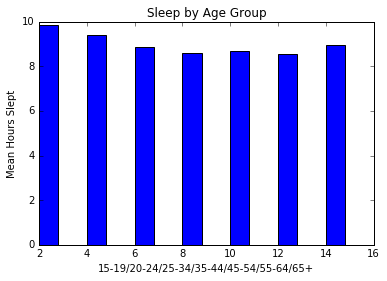

In [399]:
y=[9.87,9.41,8.86,8.60,8.69,8.57,8.95]
x=[2,4,6,8,10,12,14]
plt.bar(x,y)
plt.xlabel('15-19/20-24/25-34/35-44/45-54/55-64/65+')
plt.ylabel('Mean Hours Slept')
plt.title('Sleep by Age Group')

In [400]:
sex_sleep=summary_activity[summary_activity.Sex < 3]
sex_sleep=sex_sleep[sex_sleep.Sex > 0]
male_sleep=sex_sleep[sex_sleep.Sex == 1]
female_sleep=sex_sleep[sex_sleep.Sex == 2]
male_mean=male_sleep['Hours Slept'].mean()
female_mean=female_sleep['Hours Slept'].mean()
print('Mean hours slept for men:', male_mean)
print('Mean hours slept for women:', female_mean)

Mean hours slept for men: 8.70283632579
Mean hours slept for women: 8.91799628942


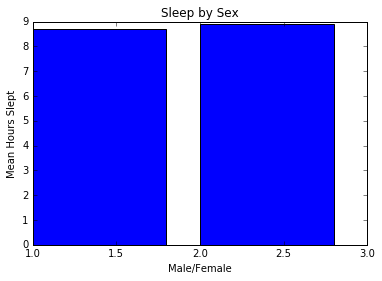

In [401]:
y=[8.7028,8.9180]
x=[1,2]
plt.bar(x,y)
plt.xlabel('Male/Female')
plt.ylabel('Mean Hours Slept')
plt.title('Sleep by Sex')

In [402]:
whites_only=summary_activity[summary_activity.Race == 1]
blacks_only=summary_activity[summary_activity.Race ==2]
amer_indian=summary_activity[summary_activity.Race == 3]
asian_only=summary_activity[summary_activity.Race == 4]
white_mean=whites_only['Hours Slept'].mean()
black_mean=blacks_only['Hours Slept'].mean()
amerind_mean=amer_indian['Hours Slept'].mean()
asian_mean=asian_only['Hours Slept'].mean()
print('Mean hours slept by whites',white_mean)
print('Mean hours slept by blacks',black_mean)
print('Mean hours slept by American Indians',amerind_mean)
print('Mean hours slept by asians', asian_mean)

Mean hours slept by whites 8.76348263586
Mean hours slept by blacks 9.12134520277
Mean hours slept by American Indians 8.55
Mean hours slept by asians 8.96773276475


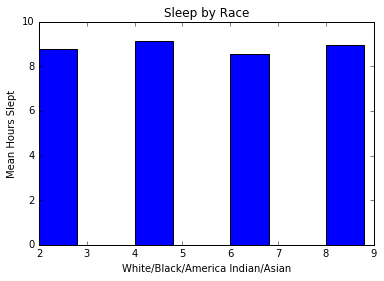

In [403]:
y=[white_mean,black_mean,amerind_mean,asian_mean]
x=[2,4,6,8]
plt.bar(x,y)
plt.xlabel('White/Black/America Indian/Asian')
plt.ylabel('Mean Hours Slept')
plt.title('Sleep by Race')

In [404]:
def weekly_to_yearly_income(week_income):
    return week_income * 52.39
summary_activity['YearlyEarn'] = weekly_to_yearly_income(summary_activity['WeeklyEarn'])
clean_sa=summary_activity[summary_activity.WeeklyEarn > 0]
clean_sa=clean_sa[clean_sa.Age >18]

In [405]:
incomeless50=clean_sa[clean_sa.YearlyEarn <=50000]
income51100=clean_sa[clean_sa.YearlyEarn > 50000]
income51100=clean_sa[clean_sa.YearlyEarn <100000]
income100300=clean_sa[clean_sa.YearlyEarn >100000]
income100300=clean_sa[clean_sa.YearlyEarn < 300000]
income300greater=clean_sa[clean_sa.YearlyEarn > 300000]
incomeless50mean=incomeless50['YearlyEarn'].mean()
income51100mean=income51100['YearlyEarn'].mean()
income100300mean=income100300['YearlyEarn'].mean()
income300greatermean=income300greater['YearlyEarn'].mean()
print('Mean income for earners in category:')
print('Less than $50,000 ', incomeless50mean)
print('$50,000-$100,000  ', income51100mean)
print("$100,000-$300,000 ", income100300mean)
print('> $300,000        ',income300greatermean)

Mean income for earners in category:
Less than $50,000  5369.975
$50,000-$100,000   51385.8583333
$100,000-$300,000  175187.04878
> $300,000         5097708.51263


In [406]:
inc50=incomeless50['Hours Slept'].mean()
inc511=income51100['Hours Slept'].mean()
inc100=income100300['Hours Slept'].mean()
inc300=income300greater['Hours Slept'].mean()
print('Mean Hours Slept for Income Brackets:')
print('<50k        ',inc50)
print('50-100k     ', inc511)
print('100-300k    ',inc100)
print('>300k       ',inc300)

Mean Hours Slept for Income Brackets:
<50k         8.0
50-100k      8.04166666667
100-300k     8.89105691057
>300k        8.55616002215


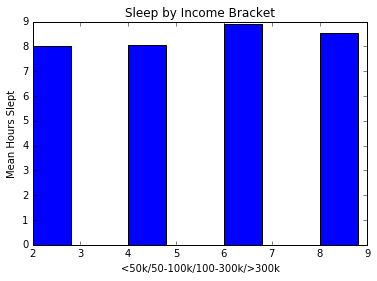

In [407]:
y=[inc50,inc511,inc100,inc300]
x=[2,4,6,8]
plt.bar(x,y)
plt.xlabel('<50k/50-100k/100-300k/>300k')
plt.ylabel('Mean Hours Slept')
plt.title('Sleep by Income Bracket')

In [410]:
print('As can be seen in the table below, there is a negative')
print('correlation between hours slept and yearly earnings.')
print('The correlation coefficient is -0.1.')

As can be seen in the table below, there is a negative
correlation between hours slept and yearly earnings.
The correlation coefficient is -0.1.


In [409]:
clean_sa.corr()

,ID,Age,Sex,Race,WeeklyEarn,Time Slept,Hours Slept,YearlyEarn
ID,1.000000,-0.022320,-0.036952,-0.006067,0.008579,0.016065,0.016065,0.008579
Age,-0.022320,1.000000,0.006346,-0.057015,0.081418,-0.086526,-0.086526,0.081418
Sex,-0.036952,0.006346,1.000000,-0.000116,-0.237098,0.055118,0.055118,-0.237098
Race,-0.006067,-0.057015,-0.000116,1.000000,0.012970,0.008858,0.008858,0.012970
WeeklyEarn,0.008579,0.081418,-0.237098,0.012970,1.000000,-0.102716,-0.102716,1.000000
Time Slept,0.016065,-0.086526,0.055118,0.008858,-0.102716,1.000000,1.000000,-0.102716
Hours Slept,0.016065,-0.086526,0.055118,0.008858,-0.102716,1.000000,1.000000,-0.102716
YearlyEarn,0.008579,0.081418,-0.237098,0.012970,1.000000,-0.102716,-0.102716,1.000000
